# Lab02: Geographic Data / Maps
![Map](http://geopandas.org/_images/world_randomcolors.png)

In [1]:
import pip
!pip install geopandas descartes

     |████████████████████████████████| 1.0 MB 2.7 MB/s 
     |████████████████████████████████| 19.3 MB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 4.0 MB/s 
     |████████████████████████████████| 7.7 MB 4.3 MB/s 


[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas **extends the datatypes used by pandas** to allow spatial operations on geometric types. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Structures
Similarly to pandas, GeoPandas provides two data structures for working with geographic data:
* GeoDataFrame
* GeoSeries

### GeoSeries
A `GeoSeries` is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).
* Points/Multi-Points
* Lines/Multi-Lines
* Polygons/Multi-Polygons

### GeoDataFrame
A ``GeoDataFrame`` is a tabular data structure that contains a ``GeoSeries``.

The most important property of a ``GeoDataFrame`` is that it always has one ``GeoSeries`` column that holds a special status. This ``GeoSeries`` is referred to as the ``GeoDataFrame``'s "geometry". When a spatial method is applied to a ``GeoDataFrame`` (or a spatial attribute like area is called), this commands will always act on the "geometry" column.

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


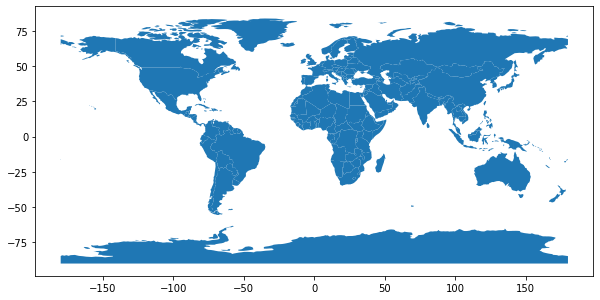

In [4]:
world.plot(figsize=(10,10))
plt.show()

Let's visualize only the centers of each country:

In [ ]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot(figsize=(10,10))
plt.show()

Now, we are switching the geometry back again.

In [ ]:
world = world.set_geometry('geometry')
world.plot(figsize=(10,10))
plt.show()

## Show me some data!

In [ ]:
world.head()

In [ ]:
world.plot(column='pop_est', figsize=(10,10))

### Focus on Europe

In [ ]:
europe = world.loc[world['continent'] == 'Europe', :]
europe.plot(column='pop_est', figsize=(50,10), legend=True)
plt.show()

 
### Can I use my own data?
Sure. What about **worldwide internet usage** (as % of population)? This data is available at the [World Bank Open Data](https://data.worldbank.org/) site.

The file `internet_usage.csv` can be found in the eLearning course.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/internet_usage.csv', skiprows=3)
df.head()

Get some information about the data. Use a method to get some stats (mean, count, standard deviation, percentiles, etc.) from the data frame. Hint: it is the same function as with the pandas dataframe.

In [ ]:
df.describe()

Hmm.. A lot of missing data. Get rid of the missing values and describe it again.

In [ ]:
df.dropna(axis='columns', how='all', inplace=True)
df.describe()

Now, we are only interested in the data from 2017. Extract those with additional County Name and -Code.

In [ ]:
df = df.loc[:, ['Country Name', 'Country Code', '2017']]
df.head()

Check if and how many missing values are in the 2017 data.

In [ ]:
df['2017'].isna().sum()

### Merge the two datasets
We need to merge the two datasets, so that we have the shape and the internet usage value for each country. Merging can only be done based on columns with equal values. In our case, this can be the **country name**.

In [ ]:
merge = world.set_index('iso_a3').join(df.set_index('Country Code'))
merge.head()

### Plot internet usage
Now plot the 2017 internet usage for each country in a world map

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## TASK 1:  Plot European Internet usage

Merge the ``europe`` GeoDataFrame (european countries only) with the internet usage data in ``df`` and plot the result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## What about Cities instead of Countries?

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

In [ ]:
cities.plot(figsize=(20,10))
plt.show()

In [ ]:
base = world.plot(color='white', edgecolor='black', figsize=(20,10))
cities.plot(ax=base, marker='s', color='green', markersize=10)
plt.title('World Capitals', fontsize=20)
plt.show()

## TASK 2: Plot a map with new data.

Go to the [World Bank Open Data](https://data.worldbank.org/) site. Find and download a new data set. Use this dataset to visualize a new map.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## TASK3: Plot Internet Usage of a Single Country over Time
Use a country of your choice! You can use a simple lineplot for this task.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Futher Reading
[GeoPandas documentation](http://geopandas.org/)

## Finished
You are done! Don't forget to submit using the eLearning system.
